In [526]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re

# Load the data
df_agri_pi = pd.read_csv('agricultural_price_indices.csv')

## **Sorting Features**

**Crop Production**
- Cereals: Includes all types of wheat, barley, and oats.
- Vegetables: Encompasses all fresh vegetables such as cauliflowers, cabbages, lettuce, carrots, onions, mushrooms, potatoes, tomatoes, and green beans.
- Fruits: Covers all types of apples, pears, strawberries, and raspberries.
- Industrial and Other Crops: Includes oilseed rape, sugar beet, industrial crops, forage plants, straw, and flowers.

**Livestock and Animal Products**
- Livestock: All categories related to cattle, pigs, sheep, lambs, and export animals.
- Poultry: Chickens, turkeys, and other poultry.
- Animal Products: Milk, eggs (intensive and free range), and wool.

**Agricultural Inputs**
- Seeds and Soil Treatments: Seeds, fertilizers, soil improvers, and plant protection products like fungicides, insecticides, and herbicides.
- Energy and Feedingstuffs: Includes energy sources (electricity, fuels), lubricants, and all types of animal feed.

**Agricultural Infrastructure and Maintenance**
- Infrastructure: Buildings, machinery, transport equipment, and other physical infrastructure.
- Maintenance Services: Includes the maintenance of materials and buildings.

In [527]:
# Crop Production
cereals = ["wheat", "barley", "oats", 'wheat_breadmaking','wheat_other_milling','barley_malting','oats_milling']
vegetables_and_fruits = [
    'fresh_vegetables', 'fresh_fruit', 
    "cauliflowers", "cabbages", "lettuce", "carrots", "onions", "mushrooms",
    "potatoes", "strawberries", "tomatoes", "beans_green", "dessert_apples",
    "cooking_apples", "dessert_pears", "raspberries",
]
other_crops = [
    "industrial_crops", "forage_plants", "straw", "flowers_and_plants",
    "oilseed_rape_non_set_aside", "sugar_beet"
]

# Livestock and Products
livestock = [
    "cattle_and_calves", "cattle_clean", "cows_and_bulls", "calves", "pigs",
    "pigs_clean", "sows_and_boars", "sheep_and_lambs", "sheep_and_lambs_clean",
    "ewes_and_rams", "chickens", "turkeys"
]
products = [
    "milk", "eggs", "intensive_eggs", "free_range_eggs", "wool_clip", 'other_crop_products','animals_for_slaughter_export'
]

# Agricultural Inputs
inputs = [
    "seeds_input", "straight_fertilisers", "straight_fertilisers_nitrogenous",
    "straight_fertilisers_phosphatic", "straight_fertilisers_potassic",
    "compound_fertilisers", "electricity", "fuels_for_heating", "motor_fuels",
    "animal_feedingstuffs", "straight_feedingstuffs", "cereal_and_milling_by_products",
    "feed_wheat", "feed_barley", "feed_oats", "oilcakes", "soya_bean_meal",
    
    "sunflower_seed_meal", "rape_seed_meal", "products_of_animal_origin_incl_white_fish_meal",
    "field_peas", "field_beans", "soya_beans", "compound_feedingstuffs",
    "fungicides", "insecticides", "herbicides", "energy_and_lubricants", "veterinary_services",
    
    'compound_feedingstuffs_for_cattle_and_calves','compound_feedingstuffs_for_pigs',
    'compound_feedingstuffs_for_poultry','compound_feedingstuffs_for_sheep',
    
    'oats_feeding', 'barley_feeding', 'wheat_feeding',

    'fertilisers_and_soil_improvers','other_fertilisers_and_soil_improvers','plant_protection_products',
    'other_plant_protection_products','other_straights',
]

# Infrastructure and Services
infrastructure = [
    "buildings", "machinery_and_other_equipment", "plant_and_machinery_for_cultivation",
    "farm_machinery_and_installations", "transport_equipment", "tractors", "other_vehicles"
]
maintenance = ["maintenance_of_materials", "maintenance_of_buildings", 'other_goods_and_services', 'materials']

# Summary
summary = [
    'all_agricultural_outputs', 'all_agricultural_inputs', 'crop_products','animals_and_animal_products',
    'all_goods_and_services_currently_consumed_in_agriculture','goods_and_services_contributing_to_investment',
    'cereals','animal_products','all_poultry'
]

`'ringway'`, `'southampton'`, `'cwmystwyth'` removed as the station does not provide data between 2014 and 2024

In [528]:
stations = [
    'aberporth','armagh','ballypatrick_forest','bradford','braemar','camborne','cambridge_niab','cardiff_bute_park',
    'chivenor','dunstaffnage','durham','eastbourne','eskdalemuir','heathrow','hurn','lerwick',
    'leuchars','lowestoft','manston','nairn','newton_rigg','oxford','paisley','ross_on_wye',
    'shawbury','sheffield','stornoway','sutton_bonington','tiree','valley','waddington',
    'whitby_coastguard','wick_airport','yeovilton'
]

## **Cleaning Data**

In [529]:
# removing non-numeric characters from the data
def clean_data(df):
    for column in df.columns:
        df[column] = df[column].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))
    return df

# correcting the data types
def set_types(df):
    df['yyyy'] = pd.to_numeric(df['yyyy'])
    df['mm'] = pd.to_numeric(df['mm'])
    df['tmax(degC)'] = pd.to_numeric(df['tmax(degC)'])
    df['tmin(degC)'] = pd.to_numeric(df['tmin(degC)'])
    df['af(days)'] = pd.to_numeric(df['af(days)'])
    df['rain(mm)'] = pd.to_numeric(df['rain(mm)'])
    df['sun(hours)'] = pd.to_numeric(df['sun(hours)'])
    return df

In [530]:
# removing the day from the date to equal: `yyyy-mm`
df_agri_pi['date'] = df_agri_pi['date'].apply(lambda x: x[:7])

## **Aggregating Climate Data**

In [531]:
import pandas as pd

def process_excel_file(file_path):
    # Read the Excel file
    df = pd.read_excel(file_path)
    
    # Apply cleaning functions
    df = clean_data(df)
    df = set_types(df)
    
    # Fill NaN values with 0
    df.fillna(0, inplace=True)

    # Filter data from 2014 onwards
    df = df[df['yyyy'] >= 2014]

    # Add leading zeros to the month column
    df['mm'] = df['mm'].astype(str).str.zfill(2)

    # Add columns of respective years and months together
    df['date'] = df['yyyy'].astype(str) +"-"+ df['mm'].astype(str)
    df.drop(columns=['yyyy', 'mm'], inplace=True)
    df.set_index('date', inplace=True)
    
    return df

In [532]:
# creating mean of all stations
sum = process_excel_file('weather/'+stations[0]+'.xlsx')
for i in stations[1:]:
    try:
        sum = sum.add(process_excel_file('weather/'+i+'.xlsx'), fill_value=0)
    except:
        print(i)
        continue
df_stations = sum/len(stations)

In [533]:
df_stations.head()

,tmax(degC),tmin(degC),af(days),rain(mm),sun(hours)
date,,,,,
2014-01,8.179412,3.067647,3.852941,150.797059,32.873529
2014-02,8.658824,3.373529,1.647059,128.802941,55.305882
2014-03,11.108824,3.717647,3.235294,59.488235,92.844118
2014-04,13.497059,6.147059,0.970588,54.976471,105.585294
2014-05,15.461765,8.200000,0.411765,84.252941,110.400000


## **Exploration**

### **Using Simple Plots**

In [621]:
y_cat = 'all_agricultural_inputs'

y=df_agri_pi[df_agri_pi['category']==y_cat].set_index('date')['index'].sort_index()
x=df_stations['tmax(degC)'].sort_index()[:-2]

px.scatter(
    x=x, y=y, 
    title=f'{y_cat} vs Maximum Temperature', 
    labels={'x':'Maximum Temperature (°C)', 'y':y_cat},
    trendline='ols'
    )

### **Using Polynomial Regression**

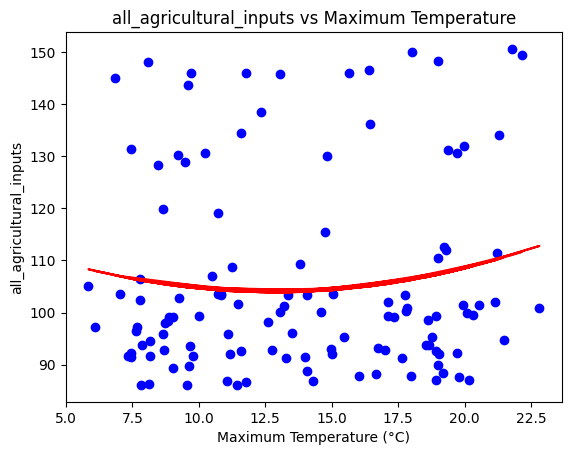

In [622]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

temperature = df_stations['tmax(degC)'].sort_index()[:-2]
inputs = df_agri_pi[df_agri_pi['category']==y_cat].set_index('date')['index'].sort_index()

# Fit a polynomial regression model
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(np.array(temperature).reshape(-1, 1))

model = LinearRegression()
model.fit(X_poly, inputs)
y_poly_pred = model.predict(X_poly)

# Plot the results
plt.scatter(temperature, inputs, color='blue')
plt.plot(temperature, y_poly_pred, color='red')
plt.title(f'{y_cat} vs Maximum Temperature')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel(y_cat)
plt.show()
